In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import tushare as ts
%matplotlib inline


In [23]:
#start ini api
pro=ts.pro_api('9526a2198c86fb0a72fa552f74ba1140033871f755dcd769e3134b7b')


In [24]:
df_mt=pro.daily(ts_code='600519.SH',start_date='20190101',end_date='20190706')
df_dong=pro.daily(ts_code='600776.SH',start_date='20190101',end_date='20190706')


In [28]:
df_mt['trade_date']=pd.to_datetime(df_mt['trade_date'])
df_dong['trade_date']=pd.to_datetime(df_dong['trade_date'])


In [30]:
df_mt.set_index(['trade_date'],inplace=True)
df_dong.set_index(['trade_date'],inplace=True)


In [35]:
df_sum=pd.merge(df_mt,df_dong,left_index=True,right_index=True,suffixes=['_mt','_dong'])


In [37]:
df_sum.tail()



,ts_code_mt,open_mt,high_mt,low_mt,close_mt,pre_close_mt,change_mt,pct_chg_mt,vol_mt,amount_mt,ts_code_dong,open_dong,high_dong,low_dong,close_dong,pre_close_dong,change_dong,pct_chg_dong,vol_dong,amount_dong
trade_date,,,,,,,,,,,,,,,,,,,,
2019-01-08,600519.SH,605.50,612.00,600.28,604.79,605.49,-0.70,-0.1156,28838.13,1750413.219,600776.SH,15.30,16.04,14.58,15.60,14.58,1.02,6.9959,1378221.64,2157031.362
2019-01-07,600519.SH,608.00,612.00,602.22,605.49,602.00,3.49,0.5797,34750.13,2105981.461,600776.SH,13.25,14.58,13.25,14.58,13.25,1.33,10.0377,980637.26,1381987.935
2019-01-04,600519.SH,587.28,607.67,582.02,602.00,590.00,12.00,2.0339,37683.47,2258501.484,600776.SH,13.08,13.94,12.90,13.25,13.88,-0.63,-4.5389,1194792.97,1602096.166
2019-01-03,600519.SH,599.97,601.66,585.80,590.00,598.98,-8.98,-1.4992,30977.35,1838179.174,600776.SH,13.00,13.88,11.87,13.88,12.62,1.26,9.9842,1511772.63,1972485.922
2019-01-02,600519.SH,609.98,612.00,595.01,598.98,590.01,8.97,1.5203,62286.49,3754387.984,600776.SH,11.46,12.62,11.22,12.62,11.47,1.15,10.0262,970425.74,1190179.310


In [55]:
df_sum['close_mt'].corr(df_sum['close_dong'])


0.3865376252895256

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023949CE8F98>,
      dtype=object)

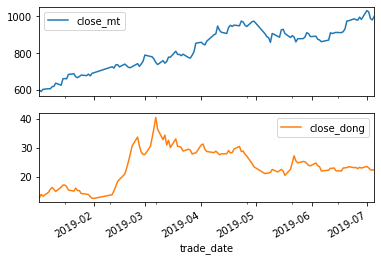

In [62]:
df_sum[['close_mt','close_dong']].plot(subplots=True)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002394B4ED6D8>,
      dtype=object)

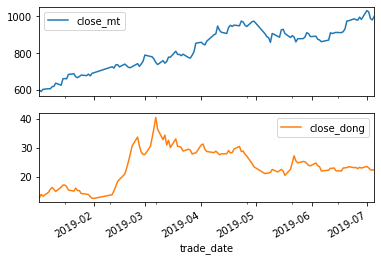

In [84]:
df_sum[['close_mt','close_dong']].plot(subplots=True)


In [87]:
df_sum.resample('Q-DEC').sum()


,open_mt,high_mt,low_mt,close_mt,pre_close_mt,change_mt,pct_chg_mt,vol_mt,amount_mt,open_dong,high_dong,low_dong,close_dong,pre_close_dong,change_dong,pct_chg_dong,vol_dong,amount_dong
trade_date,,,,,,,,,,,,,,,,,,
2019-03-31,41445.56,42098.36,40995.01,41592.53,41328.55,263.98,38.3052,2576342.58,1.869149e+08,1318.21,1386.69,1268.28,1333.85,1317.15,16.70,104.2922,62582302.71,1.452350e+08
2019-06-30,54776.60,55709.77,54020.30,54970.51,54825.96,144.55,17.1419,3052315.26,2.783321e+08,1494.06,1548.04,1455.65,1495.95,1501.14,-5.19,-14.9706,32638514.15,8.562544e+07
2019-09-30,5021.32,5084.90,4945.24,5025.78,5009.96,15.82,1.7990,254787.03,2.553366e+07,114.73,115.43,112.75,113.63,114.21,-0.58,-2.4579,1066776.66,2.448574e+06


In [88]:
df_dong.describe()


,open,high,low,close,pre_close,change,pct_chg,vol,amount
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,1.230000e+02,1.230000e+02
mean,23.796748,24.798049,23.062439,23.930325,23.841463,0.088862,0.706209,7.828260e+05,1.896821e+06
std,6.143779,6.451289,5.906788,6.083149,6.184672,1.457526,5.729807,4.297616e+05,1.280333e+06
min,11.460000,12.620000,11.220000,12.500000,11.470000,-4.050000,-10.011000,1.161964e+05,2.559459e+05
25%,20.760000,22.080000,20.205000,21.130000,20.995000,-0.655000,-2.849700,4.160795e+05,9.146990e+05
50%,23.500000,24.200000,22.920000,23.460000,23.460000,0.020000,0.071000,6.792635e+05,1.583568e+06
75%,28.420000,29.610000,27.640000,28.440000,28.440000,0.975000,4.327950,1.150108e+06,2.508825e+06
max,38.680000,41.880000,37.500000,40.490000,40.490000,3.680000,10.037700,1.827801e+06,5.939590e+06


In [89]:
#逼近法
def f(x):
    return np.sin(x)+0.5*x


In [90]:
x=np.linspace(-2*np.pi,2*np.pi,50)


Text(0, 0.5, 'y')

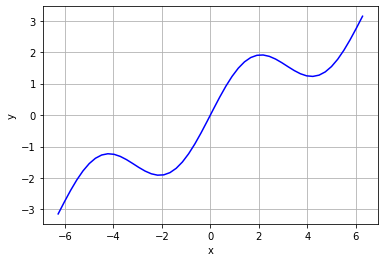

In [91]:
plt.plot(x,f(x),'b')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')


In [109]:
rho=np.polyfit(x,f(x),deg=7)
y=np.polyval(rho,x)


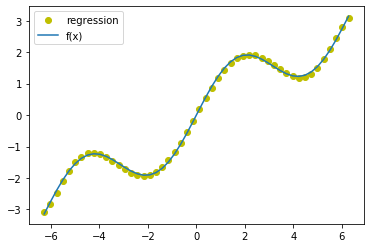

In [110]:
plt.plot(x,y,'yo',label='regression')
plt.plot(x,f(x),label='f(x)')
plt.legend(loc='best')


In [111]:
np.sum((f(x)-y)**2)/len(x)


0.0017769134759517593

In [112]:
np.allclose(f(x),y)


False

In [113]:
model=sm.OLS(y,x).fit()


In [114]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.857
Model:                            OLS   Adj. R-squared (uncentered):              0.855
Method:                 Least Squares   F-statistic:                              294.7
Date:                Tue, 09 Jul 2019   Prob (F-statistic):                    2.30e-22
Time:                        20:32:19   Log-Likelihood:                         -49.192
No. Observations:                  50   AIC:                                      100.4
Df Residuals:                      49   BIC:                                      102.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4288      0.025     17.166      0.000       0.379       0.479
==============================================================================
Omnibus:                       11.433   Durbin-Watson:                   0.075
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                2.964
Skew:                          -0.000   Prob(JB):                        0.227
Kurtosis:                       1.807   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

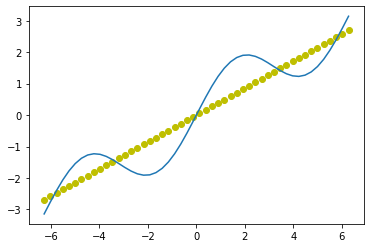

In [116]:
plt.plot(x,model.predict(),'yo')
plt.plot(x,f(x))


In [117]:
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.]



In [124]:
model.params


array([0.42884195])

In [122]:
y


array([-3.07314707, -2.81257734, -2.46322158, -2.09827793, -1.76760511,
       -1.50193401, -1.3166466 , -1.21514192, -1.19180963, -1.23463095,
       -1.32742739, -1.45177718, -1.58861969, -1.71956787, -1.82794897,
       -1.89959347, -1.92339261, -1.89164437, -1.80020835, -1.64848936,
       -1.43927015, -1.1784131 , -0.87445138, -0.53808935, -0.18163257,
        0.18163257,  0.53808935,  0.87445138,  1.1784131 ,  1.43927015,
        1.64848936,  1.80020835,  1.89164437,  1.92339261,  1.89959347,
        1.82794897,  1.71956787,  1.58861969,  1.45177718,  1.32742739,
        1.23463095,  1.19180963,  1.21514192,  1.3166466 ,  1.50193401,
        1.76760511,  2.09827793,  2.46322158,  2.81257734,  3.07314707])

In [125]:
X


array([[ 0.00000000e+00,  0.00000000e+00,  2.50000000e+01,
         1.00000000e+00],
       [ 4.08163265e-01,  3.96924149e-01,  2.10849646e+01,
         1.00000000e+00],
       [ 8.16326531e-01,  7.28634783e-01,  1.75031237e+01,
         1.00000000e+00],
       [ 1.22448980e+00,  9.40632785e-01,  1.42544773e+01,
         1.00000000e+00],
       [ 1.63265306e+00,  9.98087482e-01,  1.13390254e+01,
         1.00000000e+00],
       [ 2.04081633e+00,  8.91559230e-01,  8.75676801e+00,
         1.00000000e+00],
       [ 2.44897959e+00,  6.38550320e-01,  6.50770512e+00,
         1.00000000e+00],
       [ 2.85714286e+00,  2.80629400e-01,  4.59183673e+00,
         1.00000000e+00],
       [ 3.26530612e+00, -1.23398137e-01,  3.00916285e+00,
         1.00000000e+00],
       [ 3.67346939e+00, -5.07151709e-01,  1.75968347e+00,
         1.00000000e+00],
       [ 4.08163265e+00, -8.07581691e-01,  8.43398584e-01,
         1.00000000e+00],
       [ 4.48979592e+00, -9.75328286e-01,  2.60308205e-01,
      

In [13]:
import scipy.interpolate as spi
x=np.linspace(-2*np.pi,2*np.pi,25)


In [14]:
def f(x):
    return np.sin(x)+0.5*x


In [21]:
ipo=spi.splrep(x,f(x),k=3)
iy=spi.splev(x,ipo)


Text(0, 0.5, 'y')

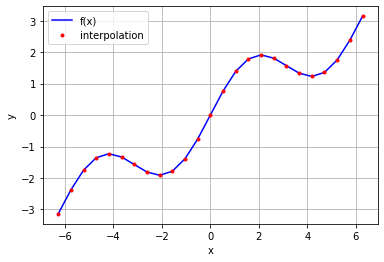

In [17]:
plt.plot(x,f(x),'b',label='f(x)')
plt.plot(x,iy,'r.',label='interpolation')
plt.legend(loc='best')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')


In [18]:
np.allclose(f(x),iy)


True

In [23]:
xd=np.linspace(1.0,3.0,50)
iyd=spi.splev(xd,ipo)


Text(0, 0.5, 'y')

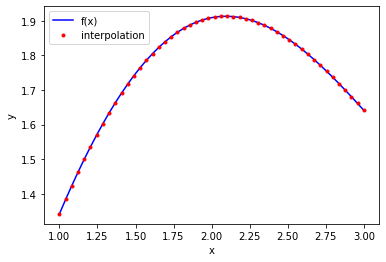

In [24]:
plt.plot(xd,f(xd),'b',label='f(x)')
plt.plot(xd,iyd,'r.',label='interpolation')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')


In [53]:
def fm(z):
    x,y=z
    return (np.sin(x)+0.05*x**2+np.sin(y)+0.05*y**2)


In [54]:
x=np.linspace(-10,10.50)
y=np.linspace(-10,10,50)
x,y=np.meshgrid(x,y)
z=fm((x,y))


In [55]:
import scipy.optimize as spo

In [58]:
opt1=spo.brute(func=fm,ranges=((-10,10.1,0.1),(-10,10.1,0.1)),finish=None)

In [59]:
opt1

array([-1.4, -1.4])

In [61]:
fm(opt1)


-1.7748994599769203

In [68]:
opt2=spo.fmin(func=fm,x0=opt1,xtol=0.001,ftol=0.001,maxiter=1000,maxfun=100)

Optimization terminated successfully.
         Current function value: -1.775726
         Iterations: 16
         Function evaluations: 32


In [65]:
opt2


array([-1.42702972, -1.42876755])

In [72]:
def Eu(z):
    s,b=z
    return -(0.5*np.sqrt(s*15+b*5)+0.5*np.sqrt(s*5+b*12))


In [79]:
cons=[{'type':'ineq','fun':lambda z:100-z[0]*10-z[1]*10}]
bnds=((0,1000),(0,1000))


In [80]:
result=spo.minimize(fun=Eu,x0=[5,5],method='SLSQP',bounds=bnds,constraints=cons)

In [81]:
result


     fun: -9.700883611487832
     jac: array([-0.48508096, -0.48489535])
 message: 'Optimization terminated successfully.'
    nfev: 21
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([8.02547122, 1.97452878])

In [82]:
import scipy.integrate as sci
def f(x):
    return np.sin(x)+0.5*x


In [87]:
a=0.5
b=9.5
sci.fixed_quad(func=f,a=a,b=b)

(24.366995967084602, None)

In [89]:
sci.dblquad(func=lambda x,y:x*y,a=0,b=0.5,gfun=lambda x:0,hfun=lambda y:1-2*y)


(0.010416666666666668, 4.101620128472366e-16)

In [90]:
import sympy as sy


In [91]:
x=sy.Symbol('x')
y=sy.Symbol('y')
type(x)

sympy.core.symbol.Symbol

In [93]:
f=x**2+3+0.5*x**2+3/2
sy.simplify(f)

1.5*x**2 + 4.5

In [95]:
sy.pretty(sy.sqrt(x)+0.5)

'√x + 0.5'

In [96]:
sy.solve(x**2-1)


[-1, 1]

In [101]:
sy.solve([2*x-y+3,3*x+y-7],*[x,y])

{x: 4/5, y: 23/5}